In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# shapes

In [ ]:
print("Shape :: ",df.shape)
# this will give total number of rows and columns

(10841, 13)

# Head

In [ ]:
print("Head :: ",df.head())

### Initial Scan

In [3]:
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values:\n", df.nunique())
print("\nDuplicates:", df.duplicated().sum())


Columns: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Data Types:
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Missing Values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Unique Values:
 App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs   

# Data Cleaning

In [4]:
# Installs
df["Installs"] = df["Installs"].str.replace("+","", regex=False).str.replace(",","", regex=False)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Price
df["Price"] = df["Price"].str.replace("$","", regex=False).str.replace("₹","", regex=False)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Rating
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df.loc[(df["Rating"] < 0) | (df["Rating"] > 5), "Rating"] = np.nan

# Reviews
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

# Size (K/M → MB)
def size_to_mb(x):
    if "M" in x:
        return float(x.replace("M",""))
    elif "k" in x or "K" in x:
        return float(x.replace("k","").replace("K",""))/1024
    else:
        return np.nan
df["Size"] = df["Size"].replace("Varies with device", np.nan)
df["Size"] = df["Size"].dropna().apply(size_to_mb)

# Last Updated
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")

# Genres (take primary)
df["Genres"] = df["Genres"].astype(str).apply(lambda x: x.split(";")[0])

# Drop duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print("Duplicates removed:", before-after)


Duplicates removed: 483


# Univariate EDA

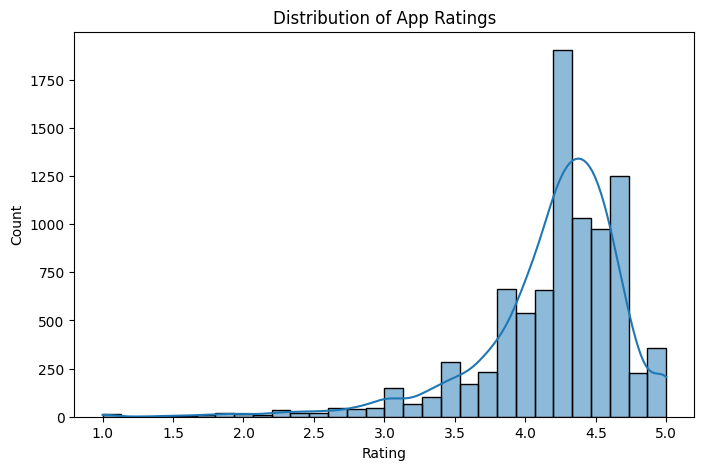

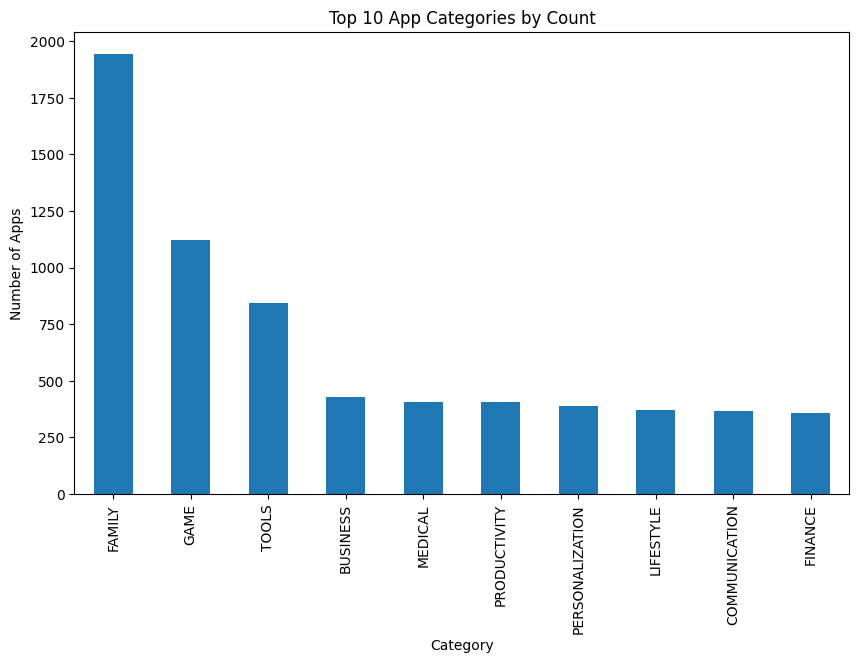

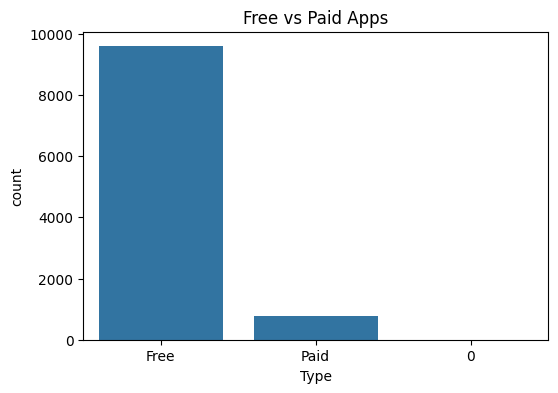

In [5]:
# Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"].dropna(), bins=30, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# Top Categories
plt.figure(figsize=(10,6))
df["Category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 App Categories by Count")
plt.ylabel("Number of Apps")
plt.show()


# Free vs Paid
plt.figure(figsize=(6,4))
sns.countplot(x="Type", data=df)
plt.title("Free vs Paid Apps")
plt.show()



# Bivariate EDA

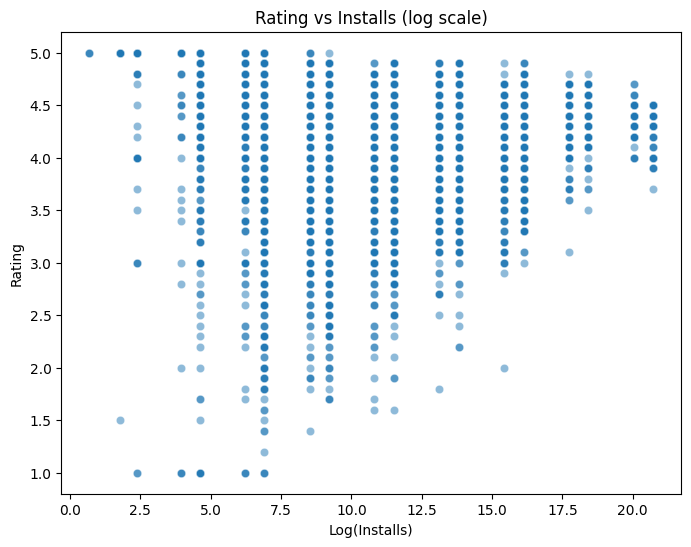

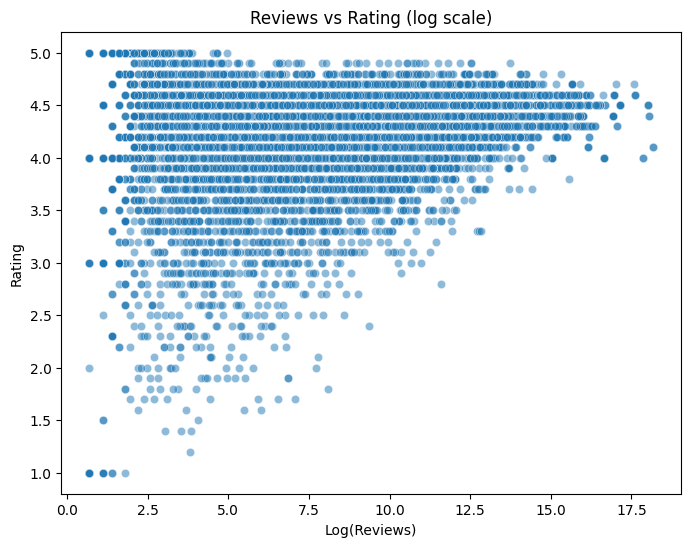

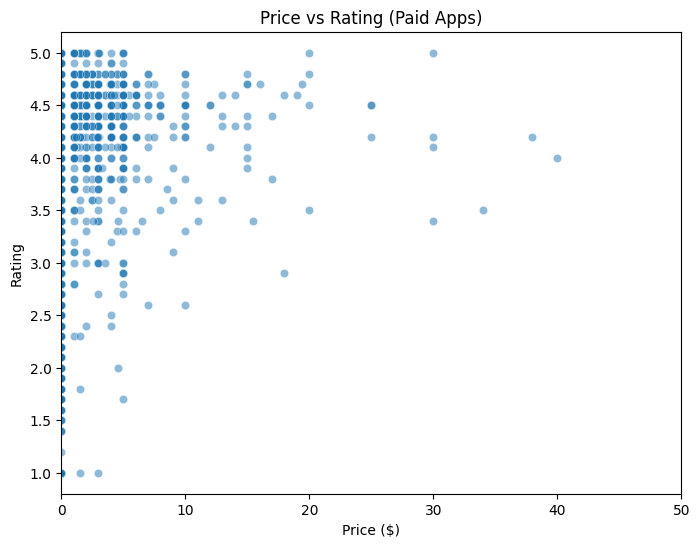

,Rating,Installs,Reviews
Category,,,
COMMUNICATION,4.151466,6.598983e+07,1.642824e+06
SOCIAL,4.254918,4.469239e+07,1.905632e+06
VIDEO_PLAYERS,4.063750,3.555430e+07,6.307439e+05
PRODUCTIVITY,4.201796,3.062185e+07,2.519767e+05
PHOTOGRAPHY,4.182895,3.019021e+07,6.344640e+05
GAME,4.281285,2.813918e+07,1.262745e+06
TRAVEL_AND_LOCAL,4.094146,2.684341e+07,2.344522e+05
ENTERTAINMENT,4.136036,2.212306e+07,4.285650e+05
NEWS_AND_MAGAZINES,4.128505,2.042886e+07,1.448707e+05


In [6]:
# Rating vs Installs
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log1p(df["Installs"]), y=df["Rating"], alpha=0.5)
plt.title("Rating vs Installs (log scale)")
plt.xlabel("Log(Installs)")
plt.ylabel("Rating")
plt.show()

# Reviews vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log1p(df["Reviews"]), y=df["Rating"], alpha=0.5)
plt.title("Reviews vs Rating (log scale)")
plt.xlabel("Log(Reviews)")
plt.ylabel("Rating")
plt.show()

# Price vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Price"], y=df["Rating"], alpha=0.5)
plt.title("Price vs Rating (Paid Apps)")
plt.xlabel("Price ($)")
plt.ylabel("Rating")
plt.xlim(0,50)
plt.show()


# Category-level averages
category_summary = df.groupby("Category").agg({
    "Rating":"mean",
    "Installs":"mean",
    "Reviews":"mean"
}).sort_values("Installs", ascending=False)

category_summary.head(10)




# Data Quality and Outliers

In [7]:
# Missing values %
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Outliers (simple z-score check)
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=np.number)
z_scores = np.abs(numeric_cols.apply(zscore, nan_policy="omit"))
outliers = (z_scores > 3).sum()
print("Potential outliers per column:\n", outliers)


Potential outliers per column:
 Rating      172
Reviews      98
Size        210
Installs    110
Price        23
dtype: int64
